The approach of quantitatively studying chemical structures & their relationships with other chemical structures as well as carbon-based biological structures or organisms is called QSAR analysis which stands for Quantitative Structure-Activity Relationship.

\

In this dataset groups of Pimpephales Promelas, commonly known as the Fathead Minnow, were exposed to 908 chemicals to predict acute aquatic toxicity towards the fish.  Within the dataset there are 908 observations, six input variables, and one target variable. They are as followed: 

- CIC0 : Complementary Information Content index (neighborhood symmetry of 0-order)
- SM1_Dz(Z) : Spectral moment of order 1 from Barysz matrix weighted by atomic number
- GATS1i : Geary autocorrelation of lag 1 weighted by ionization potential
- NdsCH : Number of atoms of type dsCH
- NdssC : Number of atoms of type dssC
- MLOGP : Moriguchi octanol-water partition coeff. (logP)

[Output or Target Variable]
- LC50 [-LOG(mol/L)]: The concentration proving lethal to 50% of the test population when exposed to the chemical at a duration of 96 hours

Data was pulled from the UCI repository: https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

\


Relevant Papers: 
M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. A similarity-based QSAR model for predicting acute toxicity towards the fathead minnow (Pimephales promelas), SAR and QSAR in Environmental Research (2015), 26, 217-243; https://doi.org/10.1080/1062936X.2015.1018938

 \

The purpose of this project is to take note of any statistical observations and variable correlations, provide visualiztions, and use multivariate analysis to predict concentrations of chemicals that would be lethal for the fathead minnow. 


In [ ]:
import sklearn as skl
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

In [ ]:
names=["CIC0","SM1_Dz(Z)", "GATS1i","NdsCH","NdssC","MLOGP"," LC50"]
data = pd.read_csv("/content/drive/MyDrive/Data_Science/Data_Pool/qsar_fish_toxicity.csv", delimiter=';', names=names)
data

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [ ]:
data.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [ ]:
for i in data:
  print(data[i].value_counts())

2.126    14
3.080    11
2.377     9
2.479     7
2.508     7
         ..
3.055     1
2.417     1
3.128     1
4.395     1
4.057     1
Name: CIC0, Length: 502, dtype: int64
0.223    135
0.134     74
0.405     69
0.331     39
0.000     36
        ... 
1.477      1
1.214      1
1.327      1
1.371      1
1.032      1
Name: SM1_Dz(Z), Length: 186, dtype: int64
0.941    8
1.179    7
0.871    7
0.954    7
0.938    7
        ..
1.700    1
1.563    1
1.481    1
2.095    1
1.183    1
Name: GATS1i, Length: 557, dtype: int64
0    760
1    107
2     29
4      7
3      5
Name: NdsCH, dtype: int64
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: NdssC, dtype: int64
0.800    10
1.701    10
2.604     9
0.202     9
1.748     9
         ..
3.225     1
2.031     1
2.297     1
1.437     1
4.754     1
Name: MLOGP, Length: 559, dtype: int64
3.513    4
4.208    4
3.979    3
3.926    3
3.660    3
        ..
4.342    1
7.691    1
4.727    1
5.510    1
8.201    1
Name:  LC50, Length: 827, dtype

In [ ]:
def detailed_qsar_vis(data):
 
    print("Histograms")
    fig1, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2)
    plt.subplots_adjust(wspace=0.4, hspace=1)
    ax1.hist(data['CIC0'], color='r')
    ax1.set_xlabel('CIC0')
    ax2.hist(data['SM1_Dz(Z)'], color='g')
    ax2.set_xlabel('SM1_Dz(Z)')
    ax3.hist(data['GATS1i'],color='y')
    ax3.set_xlabel('GATS1i')
    ax4.hist(data['MLOGP'],color='b')
    ax4.set_xlabel('MLOGP')
    
    fig2, (ax5,ax6) = plt.subplots(2,1)
    ax5.barh(data['NdsCH'].value_counts().index, data['NdsCH'].value_counts().values,color='m')
    ax6.set_xlabel('Frequency of molecules in Dataset')
    ax5.set_ylabel('CH molecules')
    ax6.barh(data['NdssC'].value_counts().index, data['NdssC'].value_counts().values,color='c')
    ax6.set_ylabel('C atoms')
    plt.show((ax1,ax2,ax3,ax4,ax5,ax6))

    print()
    print()
    print("Density Distributions")
    fig2 = data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(9,9))
    plt.show((fig2,))


    print()
    print()
    print("Boxplots")
    fig3 = data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,15))
    plt.show((fig3,))

    print()
    print()
    print("Pearson R Coefficient Matrix")
    plt.rcParams['font.size'] = '16'
    plt.subplots(figsize=(9,9))
    cor = data.corr(method='pearson')
    cor_map = sns.heatmap(cor, annot=True)
    plt.show((cor_map,))

    print()
    print()
    print("Percent of Standard Deviation Explained")
    plt.rcParams['font.size'] = '16'
    plt.subplots(figsize=(9,9))
    Explained_Std =  1-np.sqrt(1-data.corr()*np.transpose(data.corr()))
    E_std_map = sns.heatmap(Explained_Std, annot=True,)
    plt.show((E_std_map,))


    


Histograms


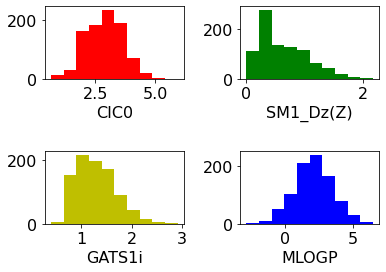

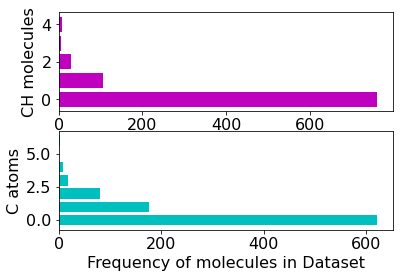



Density Distributions


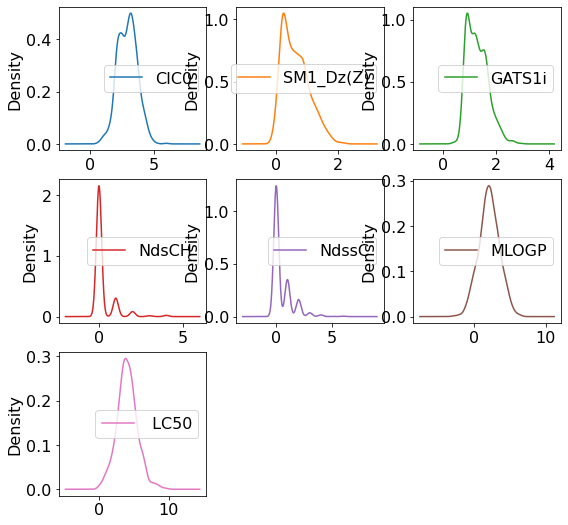



Boxplots


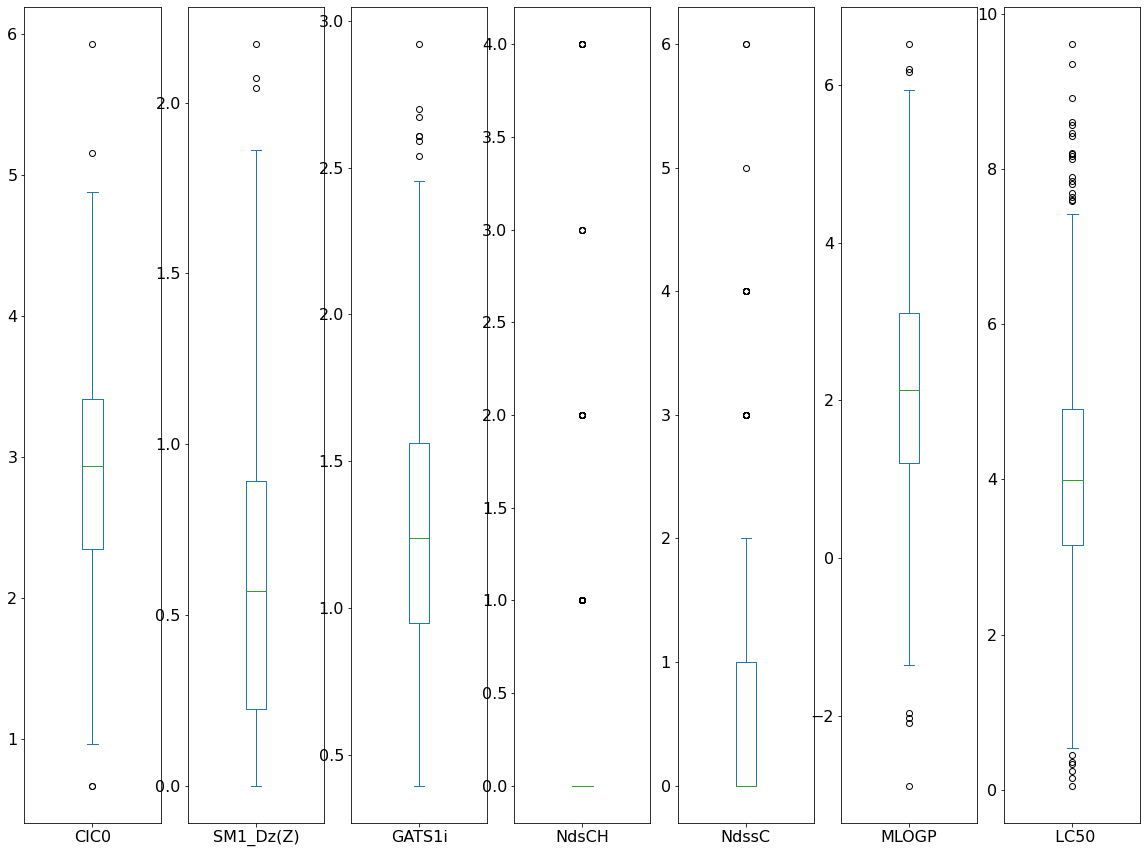



Pearson R Coefficient Matrix


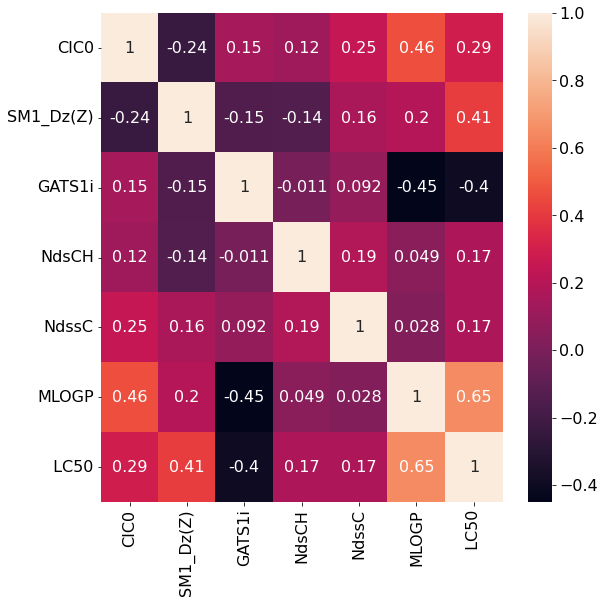



Percent of Standard Deviation Explained


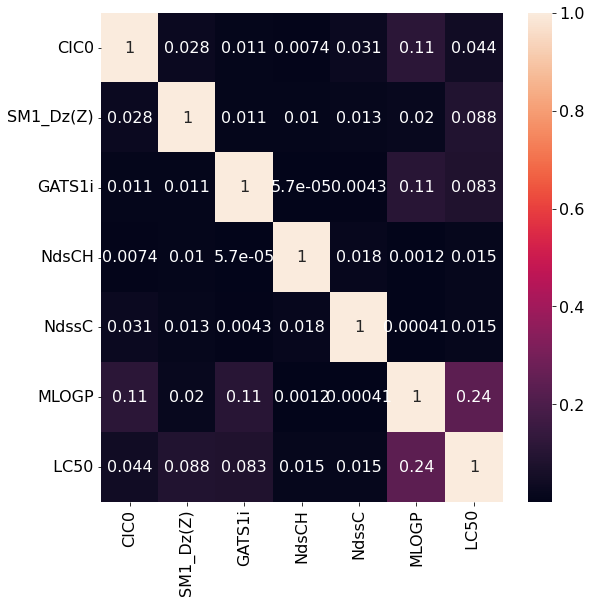

In [ ]:
detailed_qsar_vis(data)

In our visualizations we can see that all of our variables generally follow a normal distributiions with a few slight skews here and there with NdsCH and MdssC having heavily right-skewed distributions. Also, the box-plots fore these variables do not provide an interquartile ranges. This might suggest that these observations are more categorical than continuous. 

Below I binarize the observations of NdsCH and NdssC so that they observations are seen as categorical and not continuous. This is done because both variables only have five possible observations. Now the observations within each variable will hold either a one or zero indicating whether an observation (chemical compound) has X partciluar number of molecules present or not. 

---

In theory, this will help our machine learning model in:
1.   Separating variances amongst different molecule types
2.   Separating variances amongst the different number of molecules within a molecule type

In [ ]:
data_2 = pd.get_dummies(data,columns=['NdsCH', 'NdssC'])
#To use data.columns and then data.reindex to rearrange data 
cols = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'MLOGP', 'NdsCH_0', 'NdsCH_1','NdsCH_2', 'NdsCH_3', 'NdsCH_4', 'NdssC_0', 'NdssC_1', 'NdssC_2','NdssC_3', 'NdssC_4', 'NdssC_5', 'NdssC_6', ' LC50']
data2 = data_2.reindex(columns=cols)
Nds_cols = ['NdsCH_0','NdsCH_1','NdsCH_2', 'NdsCH_3', 'NdsCH_4', 'NdssC_0', 'NdssC_1', 'NdssC_2','NdssC_3', 'NdssC_4', 'NdssC_5', 'NdssC_6']
data2

,CIC0,SM1_Dz(Z),GATS1i,MLOGP,NdsCH_0,NdsCH_1,NdsCH_2,NdsCH_3,NdsCH_4,NdssC_0,NdssC_1,NdssC_2,NdssC_3,NdssC_4,NdssC_5,NdssC_6,LC50
0,3.260,0.829,1.676,1.453,1,0,0,0,0,0,1,0,0,0,0,0,3.770
1,2.189,0.580,0.863,1.348,1,0,0,0,0,1,0,0,0,0,0,0,3.115
2,2.125,0.638,0.831,1.348,1,0,0,0,0,1,0,0,0,0,0,0,3.531
3,3.027,0.331,1.472,1.807,0,1,0,0,0,1,0,0,0,0,0,0,3.510
4,2.094,0.827,0.860,1.886,1,0,0,0,0,1,0,0,0,0,0,0,5.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0.736,1,0,0,0,0,0,0,1,0,0,0,0,3.109
904,3.652,0.872,0.867,3.983,0,0,1,0,0,0,0,0,1,0,0,0,4.040
905,3.763,0.916,0.878,2.918,1,0,0,0,0,0,0,0,0,0,0,1,4.818
906,2.831,1.393,1.077,0.906,1,0,0,0,0,0,1,0,0,0,0,0,5.317


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data2))
(z>3).sum()
#I'm going to leave the binarized variables out of the outlier removal and standardization
#because the numbers 0 and 1 have no true numeric value & standardizing or removing outliers would not 
#make sense. 

CIC0          1
SM1_Dz(Z)     3
GATS1i        7
MLOGP         2
NdsCH_0       0
NdsCH_1       0
NdsCH_2      29
NdsCH_3       5
NdsCH_4       7
NdssC_0       0
NdssC_1       0
NdssC_2      81
NdssC_3      18
NdssC_4       8
NdssC_5       1
NdssC_6       2
 LC50         7
dtype: int64

In [ ]:
data2_transform=data2.drop(labels=Nds_cols, axis=1)
transform_cols = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'MLOGP', ' LC50']
data2_transform

,CIC0,SM1_Dz(Z),GATS1i,MLOGP,LC50
0,3.260,0.829,1.676,1.453,3.770
1,2.189,0.580,0.863,1.348,3.115
2,2.125,0.638,0.831,1.348,3.531
3,3.027,0.331,1.472,1.807,3.510
4,2.094,0.827,0.860,1.886,5.390
...,...,...,...,...,...
903,2.801,0.728,2.226,0.736,3.109
904,3.652,0.872,0.867,3.983,4.040
905,3.763,0.916,0.878,2.918,4.818
906,2.831,1.393,1.077,0.906,5.317


In [ ]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

def remove_outliers(data):
  PT = PowerTransformer('yeo-johnson')
  standardized_data = pd.DataFrame(PT.fit_transform(data), columns=transform_cols)
  z = np.abs(stats.zscore(standardized_data))
  global outliers
  outliers = np.where(z>3)[0]
  print(outliers)
  global data_RO
  data_RO = data.drop(data.index[outliers])
  print("The dataset 'data' is now renamed 'data_RO' which is short for 'data_Removed_Outliers'")
  print("A secondary dataset called 'data_scaled_RO' for MinMaxScaling is also created. Lets see if this works better")
  print("A tertiary dataset called 'data_standard_RO' is created where all non-binary variables are mapped along a normal distribution")
  global data_scaled_RO
  data_scaled_RO = pd.DataFrame(MinMaxScaler().fit_transform(data_RO),columns=transform_cols)
  global data_standard_RO
  data_standard_RO = standardized_data.drop(standardized_data.index[outliers])
  return data_RO, data_scaled_RO, data_standard_RO

This secondary dataset is created and the points are set between 0 and 1, with 1 being holding the largest value of the normalized data...

In [ ]:
remove_outliers(data2_transform)
#Ensuring that the binarized variables who corresponding 
#observations have been removed with outlier analysis 
#are also removed.


[ 72  77  84 259 372 416 592 594 680 708 889]
The dataset 'data' is now renamed 'data_RO' which is short for 'data_Removed_Outliers'
A secondary dataset called 'data_scaled_RO' for MinMaxScaling is also created. Lets see if this works better
A tertiary dataset called 'data_standard_RO' is created where all non-binary variables are mapped along a normal distribution


(      CIC0  SM1_Dz(Z)  GATS1i  MLOGP   LC50
 0    3.260      0.829   1.676  1.453  3.770
 1    2.189      0.580   0.863  1.348  3.115
 2    2.125      0.638   0.831  1.348  3.531
 3    3.027      0.331   1.472  1.807  3.510
 4    2.094      0.827   0.860  1.886  5.390
 ..     ...        ...     ...    ...    ...
 903  2.801      0.728   2.226  0.736  3.109
 904  3.652      0.872   0.867  3.983  4.040
 905  3.763      0.916   0.878  2.918  4.818
 906  2.831      1.393   1.077  0.906  5.317
 907  4.057      1.032   1.183  4.754  8.201
 
 [897 rows x 5 columns],          CIC0  SM1_Dz(Z)    GATS1i     MLOGP      LC50
 0    0.547341   0.400290  0.530115  0.429073  0.428200
 1    0.291915   0.280058  0.156322  0.416354  0.350722
 2    0.276652   0.308064  0.141609  0.416354  0.399929
 3    0.491772   0.159826  0.436322  0.471956  0.397445
 4    0.269258   0.399324  0.154943  0.481526  0.619825
 ..        ...        ...       ...       ...       ...
 892  0.437873   0.351521  0.782989  0.342

In [ ]:
data2_Nds = data2[Nds_cols].drop(outliers)

In [ ]:
data_scaled_RO

,CIC0,SM1_Dz(Z),GATS1i,MLOGP,LC50
0,0.547341,0.400290,0.530115,0.429073,0.428200
1,0.291915,0.280058,0.156322,0.416354,0.350722
2,0.276652,0.308064,0.141609,0.416354,0.399929
3,0.491772,0.159826,0.436322,0.471956,0.397445
4,0.269258,0.399324,0.154943,0.481526,0.619825
...,...,...,...,...,...
892,0.437873,0.351521,0.782989,0.342217,0.350012
893,0.640830,0.421053,0.158161,0.735554,0.460137
894,0.667303,0.442298,0.163218,0.606541,0.552165
895,0.445027,0.672622,0.254713,0.362810,0.611190


In [ ]:
group = np.concatenate((data_RO.drop(' LC50', axis=1).values,data2_Nds.values), axis=1)
data_RO_bin = pd.DataFrame(np.concatenate((group, data_RO[' LC50'].values.reshape(-1,1)), axis=1), columns=cols)
data_RO_bin

group2 =  np.concatenate((data_scaled_RO.drop(' LC50', axis=1).values,data2_Nds.values), axis=1)
data_RO_bin_scaled = pd.DataFrame(np.concatenate((group2, data_scaled_RO[' LC50'].values.reshape(-1,1)), axis=1), columns=cols)

In [ ]:
data_RO_bin_scaled

,CIC0,SM1_Dz(Z),GATS1i,MLOGP,NdsCH_0,NdsCH_1,NdsCH_2,NdsCH_3,NdsCH_4,NdssC_0,NdssC_1,NdssC_2,NdssC_3,NdssC_4,NdssC_5,NdssC_6,LC50
0,0.547341,0.400290,0.530115,0.429073,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.428200
1,0.291915,0.280058,0.156322,0.416354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350722
2,0.276652,0.308064,0.141609,0.416354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399929
3,0.491772,0.159826,0.436322,0.471956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397445
4,0.269258,0.399324,0.154943,0.481526,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.619825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.437873,0.351521,0.782989,0.342217,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.350012
893,0.640830,0.421053,0.158161,0.735554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.460137
894,0.667303,0.442298,0.163218,0.606541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.552165
895,0.445027,0.672622,0.254713,0.362810,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.611190


In [ ]:
#Machine Learning Models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor
#Regression Metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from math import sqrt


models=[]
models.append(("Linear Regression",LinearRegression()))
models.append(("Ridge", Ridge(alpha=1e-3)))
models.append(("Lasso", Lasso()))
models.append(("Bayesion Ridge", BayesianRidge()))
models.append(("XGBoost", XGBRegressor(objective='reg:squarederror')))


def Regression_Metrics(models, datasets):
  for dataset_name, dataset in datasets:
    dataset_inputs=dataset.values[:,:-1]
    dataset_output=dataset.values[:,-1:]
    x_train, x_val, y_train, y_val = train_test_split(dataset_inputs, dataset_output, test_size=0.33, shuffle=True, random_state=2)
    print()
    print()
    print(dataset_name)
    for model_name, model in models:
      model.fit(x_train,y_train.ravel())
      predictions=model.predict(x_val)
      actual=y_val.ravel()
      expl_var=explained_variance_score(actual, predictions)
      MSE=mean_squared_error(actual, predictions)
      MAE=mean_absolute_error(actual, predictions)
      MAPE=mean_absolute_percentage_error(actual, predictions)
      #RMLSE=mean_squared_log_error(actual, predictions)

      print("Model: {}".format(model_name))
      print("Explained Variance Score: {:.5f}".format(expl_var))
      print("Root Mean Squared Error: {:.5f}".format(sqrt(MSE)))
      print("Mean Absolute Error: {:.5f}".format(MAE))
      print("Mean Absolute Percent Error: {:.5f}".format(MAPE))
      #print("Root Mean Squared Log Error: {:.5f}".format(RMLSE))
      print()


In [ ]:
Regression_Metrics(models, [('Original Dataset', data)])



Original Dataset
Model: Linear Regression
Explained Variance Score: 0.54935
Root Mean Squared Error: 0.95005
Mean Absolute Error: 0.69060
Mean Absolute Percent Error: 0.32077
Root Mean Squared Log Error: 0.04388

Model: Ridge
Explained Variance Score: 0.54935
Root Mean Squared Error: 0.95005
Mean Absolute Error: 0.69060
Mean Absolute Percent Error: 0.32077
Root Mean Squared Log Error: 0.04388

Model: Lasso
Explained Variance Score: 0.21011
Root Mean Squared Error: 1.25457
Mean Absolute Error: 0.98734
Mean Absolute Percent Error: 0.56985
Root Mean Squared Log Error: 0.08341

Model: Bayesion Ridge
Explained Variance Score: 0.55031
Root Mean Squared Error: 0.94913
Mean Absolute Error: 0.69086
Mean Absolute Percent Error: 0.32224
Root Mean Squared Log Error: 0.04395

Model: XGBoost
Explained Variance Score: 0.57804
Root Mean Squared Error: 0.92007
Mean Absolute Error: 0.68612
Mean Absolute Percent Error: 0.31881
Root Mean Squared Log Error: 0.03954



In [ ]:
Regression_Metrics(models, [('Data Removed Outliers + Binarized', data_RO_bin)])



Data Removed Outliers + One Hot Encoding
Model: Linear Regression
Explained Variance Score: 0.52639
Root Mean Squared Error: 1.00087
Mean Absolute Error: 0.71184
Mean Absolute Percent Error: 0.23513
Root Mean Squared Log Error: 0.04923

Model: Ridge
Explained Variance Score: 0.52639
Root Mean Squared Error: 1.00086
Mean Absolute Error: 0.71184
Mean Absolute Percent Error: 0.23513
Root Mean Squared Log Error: 0.04923

Model: Lasso
Explained Variance Score: 0.17942
Root Mean Squared Error: 1.31756
Mean Absolute Error: 1.02652
Mean Absolute Percent Error: 0.37883
Root Mean Squared Log Error: 0.08667

Model: Bayesion Ridge
Explained Variance Score: 0.52770
Root Mean Squared Error: 0.99947
Mean Absolute Error: 0.71076
Mean Absolute Percent Error: 0.23576
Root Mean Squared Log Error: 0.04920

Model: XGBoost
Explained Variance Score: 0.60427
Root Mean Squared Error: 0.91495
Mean Absolute Error: 0.65168
Mean Absolute Percent Error: 0.21365
Root Mean Squared Log Error: 0.04016



In [ ]:
Regression_Metrics(models, [('Data Removed Outliers + Binarized Variables + Scaled NonBinary Variables', data_RO_bin_scaled)])



Data Removed Outliers + Binarized Variables + Scaled Variables
Model: Linear Regression
Explained Variance Score: 0.52639
Root Mean Squared Error: 0.11839
Mean Absolute Error: 0.08420
Mean Absolute Percent Error: 0.26076
Root Mean Squared Log Error: 0.00662

Model: Ridge
Explained Variance Score: 0.52640
Root Mean Squared Error: 0.11839
Mean Absolute Error: 0.08420
Mean Absolute Percent Error: 0.26076
Root Mean Squared Log Error: 0.00662

Model: Lasso
Explained Variance Score: 0.00000
Root Mean Squared Error: 0.17207
Mean Absolute Error: 0.13648
Mean Absolute Percent Error: 0.47805
Root Mean Squared Log Error: 0.01416

Model: Bayesion Ridge
Explained Variance Score: 0.52980
Root Mean Squared Error: 0.11796
Mean Absolute Error: 0.08406
Mean Absolute Percent Error: 0.26146
Root Mean Squared Log Error: 0.00657

Model: XGBoost
Explained Variance Score: 0.62378
Root Mean Squared Error: 0.10553
Mean Absolute Error: 0.07562
Mean Absolute Percent Error: 0.23359
Root Mean Squared Log Error: 0

Problem currently is that prior my Original Dataset + Removing Outliers was highest now it's super low. 

Also, XGBoost on the removed outliers + binarized variables + standardization + scaling on nonbinary variables dataset is higest currently, however, it is not as high as the old Original + Removing outliers dataset. I wish I didn't deleted everyhting fuuuuuuck
